## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
import warnings
from joblib import Parallel, delayed
import time

## Global Variables

In [2]:
CLASSIFIER = ''

## Notebook Start Time

In [3]:
start_time = time.time()

## Data

In [4]:
# Load dataset as pandas DataFrame
df_train = pd.read_parquet('./data/cic_iomt_2024_wifi_mqtt_train.parquet')
df_test = pd.read_parquet('./data/cic_iomt_2024_wifi_mqtt_test.parquet')  

# Create sample DataFrame for feature selection
df_train_sample = df_train.sample(frac=.001, random_state=1984)      
df_test_sample = df_test.sample(frac=.001, random_state=1984)   

# Create sample X and y from train and test, convert to numpy arrays
X_train_sample = df_train_sample.drop(columns=['label', 'class_label', 'category_label', 'attack_label']).to_numpy()
y_train_sample_2 = df_train_sample['class_label'].to_numpy()
y_train_sample_6 = df_train_sample['category_label'].to_numpy()
y_train_sample_19 = df_train_sample['attack_label'].to_numpy()



X_test_sample = df_test_sample.drop(columns=['label', 'class_label', 'category_label', 'attack_label']).to_numpy()
y_test_sample_2 = df_test_sample['class_label'].to_numpy()
y_test_sample_6 = df_test_sample['category_label'].to_numpy()
y_test_sample_19 = df_test_sample['attack_label'].to_numpy()



# Create full data X and y from train and test, convert to numpy arrays
X_train_full = df_train_sample.drop(columns=['label', 'class_label', 'category_label', 'attack_label']).to_numpy()
y_train_full_2 = df_train_sample['class_label'].to_numpy()
y_train_full_6 = df_train_sample['category_label'].to_numpy()
y_train_full_19 = df_train_sample['attack_label'].to_numpy()



X_test_full = df_test_sample.drop(columns=['label', 'class_label', 'category_label', 'attack_label']).to_numpy()
y_test_full_2 = df_test_sample['class_label'].to_numpy()
y_test_full_6 = df_test_sample['category_label'].to_numpy()
y_test_full_19 = df_test_sample['attack_label'].to_numpy()

## Benchmarks

We use hyperparameters from the CICIoMT2024 to establish benchmarks for classification on the dataset. We will then use pso to select the best features and compare results.

### Logistic Regression

In [5]:
lr_benchmark = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, solver='lbfgs', max_iter=100,
warm_start=False, n_jobs=-1)

#### Binary Classification

In [6]:
lr_benchmark.fit(X_train_full, y_train_full_2)
y_pred_lr_benchmark_2 = lr_benchmark.predict(X_test_full)

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
# print the classification report
report_lr_benchmark_2 = classification_report(y_test_full_2, y_pred_lr_benchmark_2, output_dict=True)
print(classification_report(y_test_full_2, y_pred_lr_benchmark_2))

# calculate accuracy
accuracy_lr_benchmark_2 = accuracy_score(y_test_full_2, y_pred_lr_benchmark_2)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_benchmark_2:.5f}")

              precision    recall  f1-score   support

      Attack       0.99      0.99      0.99      1579
      Benign       0.61      0.63      0.62        35

    accuracy                           0.98      1614
   macro avg       0.80      0.81      0.81      1614
weighted avg       0.98      0.98      0.98      1614

Accuracy: 0.98327


#### 6 Class Classification

In [8]:
lr_benchmark.fit(X_train_full, y_train_full_6)
y_pred_lr_benchmark_6 = lr_benchmark.predict(X_test_full)

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# print the classification report
report_lr_benchmark_6 = classification_report(y_test_full_6, y_pred_lr_benchmark_6, output_dict=True)
print(classification_report(y_test_full_6, y_pred_lr_benchmark_6))

# calculate accuracy
accuracy_lr_benchmark_6 = accuracy_score(y_test_full_6, y_pred_lr_benchmark_6)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_benchmark_6:.5f}")


              precision    recall  f1-score   support

      Benign       0.62      0.60      0.61        35
        DDos       0.67      1.00      0.80      1053
         Dos       0.00      0.00      0.00       438
        MQTT       0.20      0.02      0.03        62
       Recon       1.00      0.12      0.21        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           0.67      1614
   macro avg       0.42      0.29      0.28      1614
weighted avg       0.48      0.67      0.54      1614

Accuracy: 0.66667


#### 19 Class Classification

In [10]:
lr_benchmark.fit(X_train_full, y_train_full_19)
y_pred_lr_benchmark_19 = lr_benchmark.predict(X_test_full)

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# print the classification report
report_lr_benchmark_19 = classification_report(y_test_full_19, y_pred_lr_benchmark_19, output_dict=True)
print(classification_report(y_test_full_19, y_pred_lr_benchmark_19))

# calculate accuracy
accuracy_lr_benchmark_19 = accuracy_score(y_test_full_19, y_pred_lr_benchmark_19)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_benchmark_19:.5f}")


                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.56      0.63      0.59        35
         DDoS_ICMP       0.30      0.74      0.43       352
          DDoS_SYN       0.00      0.00      0.00       177
          DDoS_TCP       0.00      0.00      0.00       157
          DDoS_UDP       0.52      1.00      0.69       367
DDoS_connect_flood       0.00      0.00      0.00        41
DDoS_publish_flood       0.00      0.00      0.00         9
          DoS_ICMP       0.00      0.00      0.00       120
           DoS_SYN       0.00      0.00      0.00        97
           DoS_TCP       0.00      0.00      0.00        78
           DoS_UDP       0.00      0.00      0.00       143
 DoS_connect_flood       0.00      0.00      0.00         1
 DoS_publish_flood       0.00      0.00      0.00        11
           OS_scan       0.00      0.00      0.00         3
         Port_scan       0.00      0.00

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

### AdaBoost

In [12]:
ada_benchmark = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50,
learning_rate=1.0, algorithm='SAMME.R', random_state=1984)

#### Binary Classification

In [13]:
ada_benchmark.fit(X_train_full, y_train_full_2)
y_pred_ada_benchmark_2 = ada_benchmark.predict(X_test_full)

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [14]:
# print the classification report
report_ada_benchmark_2 = classification_report(y_test_full_2, y_pred_ada_benchmark_2, output_dict=True)
print(classification_report(y_test_full_2, y_pred_ada_benchmark_2))

# calculate accuracy
accuracy_ada_benchmark_2 = accuracy_score(y_test_full_2, y_pred_ada_benchmark_2)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_benchmark_2:.5f}")


              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1579
      Benign       0.91      0.86      0.88        35

    accuracy                           1.00      1614
   macro avg       0.95      0.93      0.94      1614
weighted avg       0.99      1.00      0.99      1614

Accuracy: 0.99504


#### 6 Class Classification

In [15]:
ada_benchmark.fit(X_train_full, y_train_full_6)
y_pred_ada_benchmark_6 = ada_benchmark.predict(X_test_full)

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [16]:
# print the classification report
report_ada_benchmark_6 = classification_report(y_test_full_6, y_pred_ada_benchmark_6, output_dict=True)
print(classification_report(y_test_full_6, y_pred_ada_benchmark_6))

# calculate accuracy
accuracy_ada_benchmark_6 = accuracy_score(y_test_full_6, y_pred_ada_benchmark_6)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_benchmark_6:.5f}")

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

              precision    recall  f1-score   support

      Benign       0.97      0.89      0.93        35
        DDos       1.00      1.00      1.00      1053
         Dos       1.00      1.00      1.00       438
        MQTT       1.00      0.98      0.99        62
       Recon       0.81      1.00      0.89        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           1.00      1614
   macro avg       0.80      0.81      0.80      1614
weighted avg       1.00      1.00      0.99      1614

Accuracy: 0.99504


#### 19 Class Classification

In [17]:
ada_benchmark.fit(X_train_full, y_train_full_19)
y_pred_ada_benchmark_19 = ada_benchmark.predict(X_test_full)

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [18]:
# print the classification report
report_ada_benchmark_19 = classification_report(y_test_full_19, y_pred_ada_benchmark_19, output_dict=True)
print(classification_report(y_test_full_19, y_pred_ada_benchmark_19))

# calculate accuracy
accuracy_ada_benchmark_19 = accuracy_score(y_test_full_19, y_pred_ada_benchmark_19)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_benchmark_19:.5f}")

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       1.00      0.91      0.96        35
         DDoS_ICMP       0.72      1.00      0.84       352
          DDoS_SYN       1.00      1.00      1.00       177
          DDoS_TCP       0.99      1.00      1.00       157
          DDoS_UDP       0.98      0.63      0.77       367
DDoS_connect_flood       1.00      1.00      1.00        41
DDoS_publish_flood       1.00      0.11      0.20         9
          DoS_ICMP       1.00      1.00      1.00       120
           DoS_SYN       1.00      0.99      0.99        97
           DoS_TCP       1.00      1.00      1.00        78
           DoS_UDP       1.00      1.00      1.00       143
 DoS_connect_flood       1.00      1.00      1.00         1
 DoS_publish_flood       0.58      1.00      0.73        11
           OS_scan       1.00      0.67      0.80         3
         Port_scan       0.91      0.95

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Random Forest

In [19]:
rf_benchmark = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, min_samples_leaf=1,
min_weight_fraction_leaf=0.0, max_features='sqrt', min_impurity_decrease=0.0,
bootstrap=True, oob_score=False, warm_start=False, ccp_alpha=0.0, n_jobs=-1, random_state=1984)

#### Binary Classification

In [20]:
rf_benchmark.fit(X_train_full, y_train_full_2) 
y_pred_rf_benchmark_2 = rf_benchmark.predict(X_test_full)    

In [21]:
# print the classification report
report_rf_benchmark_2 = classification_report(y_test_full_2, y_pred_rf_benchmark_2, output_dict=True)
print(classification_report(y_test_full_2, y_pred_rf_benchmark_2))

# calculate accuracy
accuracy_rf_benchmark_2 = accuracy_score(y_test_full_2, y_pred_rf_benchmark_2)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_benchmark_2:.5f}")

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1579
      Benign       0.97      0.89      0.93        35

    accuracy                           1.00      1614
   macro avg       0.98      0.94      0.96      1614
weighted avg       1.00      1.00      1.00      1614

Accuracy: 0.99690


#### 6 Class Classification

In [22]:
rf_benchmark.fit(X_train_full, y_train_full_6) 
y_pred_rf_benchmark_6 = rf_benchmark.predict(X_test_full)    

In [23]:
# print the classification report
report_rf_benchmark_6 = classification_report(y_test_full_6, y_pred_rf_benchmark_6, output_dict=True)
print(classification_report(y_test_full_6, y_pred_rf_benchmark_6))

# calculate accuracy
accuracy_rf_benchmark_6 = accuracy_score(y_test_full_6, y_pred_rf_benchmark_6)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_benchmark_6:.5f}")

              precision    recall  f1-score   support

      Benign       0.91      0.91      0.91        35
        DDos       1.00      1.00      1.00      1053
         Dos       1.00      1.00      1.00       438
        MQTT       1.00      1.00      1.00        62
       Recon       0.86      0.96      0.91        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           1.00      1614
   macro avg       0.80      0.81      0.80      1614
weighted avg       0.99      1.00      0.99      1614

Accuracy: 0.99504


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

#### 19 Class Classification

In [24]:
rf_benchmark.fit(X_train_full, y_train_full_19) 
y_pred_rf_benchmark_19 = rf_benchmark.predict(X_test_full)     

In [25]:
# print the classification report
report_rf_benchmark_19 = classification_report(y_test_full_19, y_pred_rf_benchmark_19, output_dict=True)
print(classification_report(y_test_full_19, y_pred_rf_benchmark_19))

# calculate accuracy
accuracy_rf_benchmark_19 = accuracy_score(y_test_full_19, y_pred_rf_benchmark_19)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_benchmark_19:.5f}")

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.91      0.91      0.91        35
         DDoS_ICMP       1.00      1.00      1.00       352
          DDoS_SYN       1.00      1.00      1.00       177
          DDoS_TCP       1.00      1.00      1.00       157
          DDoS_UDP       1.00      1.00      1.00       367
DDoS_connect_flood       1.00      1.00      1.00        41
DDoS_publish_flood       1.00      0.11      0.20         9
          DoS_ICMP       1.00      0.99      1.00       120
           DoS_SYN       1.00      1.00      1.00        97
           DoS_TCP       1.00      1.00      1.00        78
           DoS_UDP       1.00      1.00      1.00       143
 DoS_connect_flood       1.00      1.00      1.00         1
 DoS_publish_flood       0.58      1.00      0.73        11
           OS_scan       1.00      0.33      0.50         3
         Port_scan       0.78      1.00

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

## PSO Code

### PSO Variables

In [26]:
num_particles = 10                 # number of particles in the swarm - number of candidate solutions
num_iterations = 20                # number of iterations the algorithm will run
n_features = X_train_full.shape[1] # number of dataset features(45), each particle's position is length n_features

### Fitness Function

In [27]:
# define the fitness function for evaluating feature subsets
def fitness_function(position):
    # function selects the features based on the particle's position vector
    selected_features = np.where(position == 1)[0]  # select features based on particle position
    if len(selected_features) == 0:                  # avoid empty feature set
        return 0
    X_train_selected = X_train_sample[:, selected_features]
    X_test_selected = X_test_sample[:, selected_features]

    if CLASSIFIER == 'lr':
        lr = LogisticRegression(**lr_benchmark.get_params())
        lr.fit(X_train_selected, y_train_sample)
        y_pred = lr.predict(X_test_selected)

    elif CLASSIFIER == 'ada':
        ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=1984)
        ada.fit(X_train_selected, y_train_sample)               
        y_pred = ada.predict(X_test_selected) 
    
    elif CLASSIFIER == 'rf':
        rf = RandomForestClassifier(**rf_benchmark.get_params())
        rf.fit(X_train_selected, y_train_sample)               
        y_pred = rf.predict(X_test_selected) 

    accuracy = accuracy_score(y_test_sample, y_pred)      
    return accuracy                          

### Particle Class Definition

In [28]:
class FeatureParticle:
    def __init__(self, n_features):
        self.position = np.random.randint(2, size=n_features)          # initialized randomly with 1 or 0 for each dimension/feature
        self.velocity = np.zeros(n_features)                           # initial velocity of the particle
        self.best_position = np.copy(self.position)                    # feature subset (the best) that this particle has encountered
        self.best_fitness = fitness_function(self.position)            # classification accuracy of the best feature

### Particle Update Function

In [29]:
# particle processing function
def update_particle(particle):
    global global_best_fitness, global_best_position
    fitness = fitness_function(particle.position)
        
    # update personal best
    if fitness > particle.best_fitness:
        particle.best_fitness = fitness
        particle.best_position = np.copy(particle.position)
        
    # update global best
    if fitness > global_best_fitness:
        global_best_fitness = fitness
        global_best_position = np.copy(particle.position)

    # update velocity and position based on Binary PSO "flip probability"
    inertia_weight = 0.5
    cognitive_component = 1.5
    social_component = 1.5

    for i in range(len(particle.position)):
        r1, r2, fr = np.random.rand(), np.random.rand(), np.random.rand()
        particle.velocity[i] = (inertia_weight * particle.velocity[i] +
                                    cognitive_component * r1 * (particle.best_position[i] - particle.position[i]) +
                                    social_component * r2 * (global_best_position[i] - particle.position[i]))
        flip_prob = 1 / (1 + np.exp(-particle.velocity[i]))
        if fr < flip_prob:
            particle.position[i] = 1
        else:
            particle.position[i] = 0
    return particle

## Feature Selection With PSO

### Logistic Regression

In [30]:
CLASSIFIER = 'lr'

#### Binary Classification

In [31]:
y_train_sample = y_train_sample_2
y_test_sample = y_test_sample_2

In [32]:
# create list of particles
lr_particles = []                              # initialize an empty list to hold the particles
for i in range(num_particles):                 # based on defined above number of particles
    particle = FeatureParticle(n_features)     # create a new particle
    lr_particles.append(particle)              # add the particle to the list

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

In [33]:
# Initialize global best
global_best_position = lr_particles[0].best_position
global_best_fitness = lr_particles[0].best_fitness
for i in range(num_particles):
    if lr_particles[i].best_fitness > global_best_fitness:
        global_best_position = lr_particles[i].best_position
        global_best_fitness = lr_particles[i].best_fitness

In [34]:
for iteration in range(num_iterations):
    iteration_start = time.time()
    print(f"Iteration {iteration + 1}/{num_iterations}")
    # Can change n_jobs to a specific number to limit the number of processes created
    # -1 uses all cores with 1 process per core
    lr_particles = Parallel(n_jobs=1)(delayed(update_particle)(particle) for particle in lr_particles)
    
    # Update global best after all particles have been processed
    for particle in lr_particles:
        if particle.best_fitness > global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = np.copy(particle.best_position)
    iteration_end = time.time()
    print(f"Iteration time: {iteration_end - iteration_start} seconds")

Iteration 1/20
Iteration time: 1.1810059547424316 seconds
Iteration 2/20
Iteration time: 1.4505648612976074 seconds
Iteration 3/20
Iteration time: 1.6259219646453857 seconds
Iteration 4/20
Iteration time: 1.5060420036315918 seconds
Iteration 5/20
Iteration time: 1.5773069858551025 seconds
Iteration 6/20
Iteration time: 1.5657198429107666 seconds
Iteration 7/20
Iteration time: 1.4553191661834717 seconds
Iteration 8/20
Iteration time: 1.6199488639831543 seconds
Iteration 9/20
Iteration time: 1.023252010345459 seconds
Iteration 10/20
Iteration time: 1.4618780612945557 seconds
Iteration 11/20
Iteration time: 1.5599732398986816 seconds
Iteration 12/20
Iteration time: 1.5604369640350342 seconds
Iteration 13/20
Iteration time: 1.4605519771575928 seconds
Iteration 14/20
Iteration time: 1.0750572681427002 seconds
Iteration 15/20
Iteration time: 1.3226349353790283 seconds
Iteration 16/20
Iteration time: 1.6433990001678467 seconds
Iteration 17/20
Iteration time: 1.4561100006103516 seconds
Iterati

In [35]:
# use the best features identified by PSO
selected_features = np.where(global_best_position == 1)[0]
X_train_selected = X_train_full[:, selected_features]
X_test_selected = X_test_full[:, selected_features]

lr_benchmark.fit(X_train_selected, y_train_full_2) 
y_pred_lr_pso_2 = lr_benchmark.predict(X_test_selected)   

In [36]:
# print the classification report
report_lr_pso_2 = classification_report(y_test_full_2, y_pred_lr_pso_2, output_dict=True)
print(classification_report(y_test_full_2, y_pred_lr_pso_2))

print(f"Number of selected features: {len(selected_features)}")

# calculate accuracy
accuracy_lr_pso_2 = accuracy_score(y_test_full_2, y_pred_lr_pso_2)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_pso_2:.5f}")

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1579
      Benign       0.88      0.86      0.87        35

    accuracy                           0.99      1614
   macro avg       0.94      0.93      0.93      1614
weighted avg       0.99      0.99      0.99      1614

Number of selected features: 24
Accuracy: 0.99442


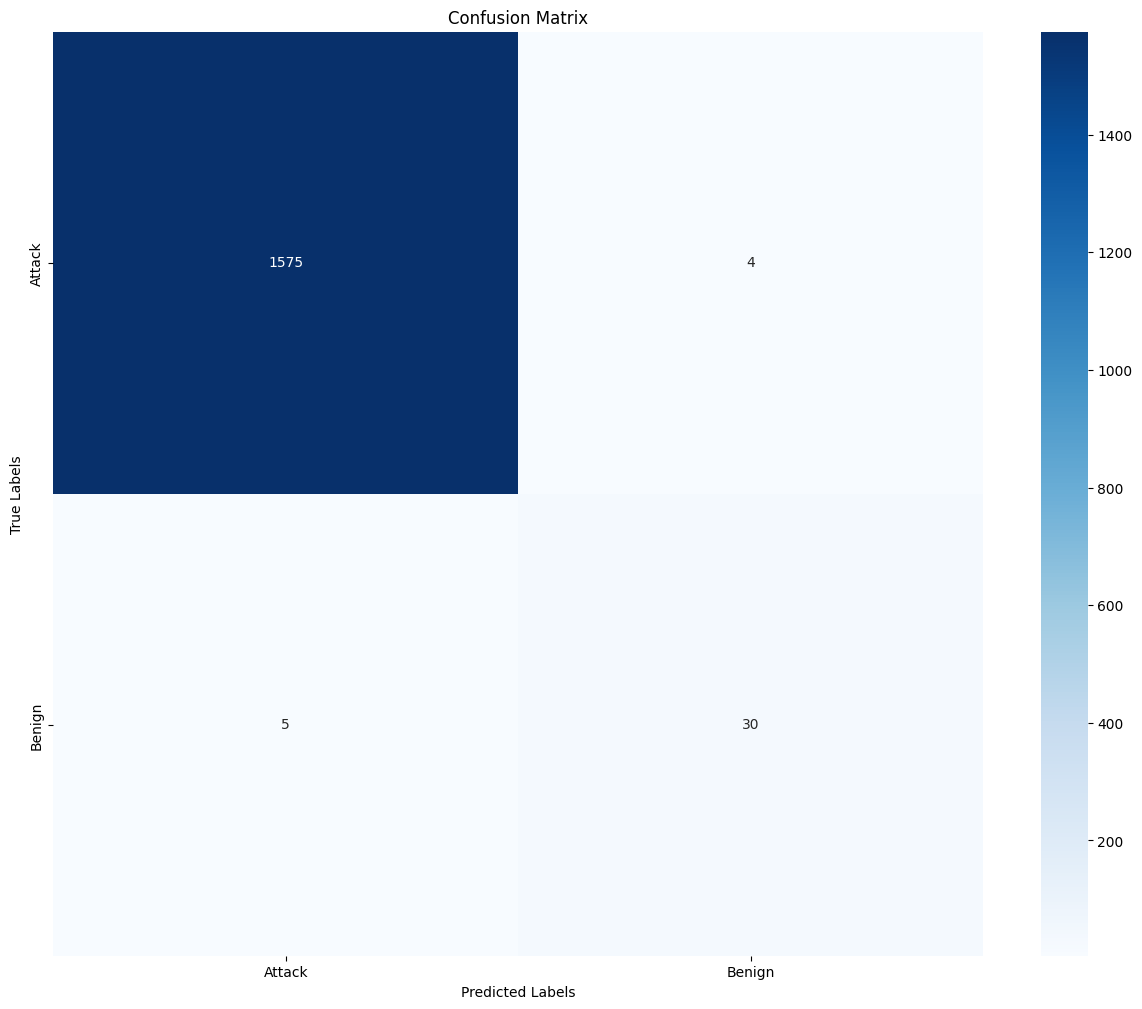

In [37]:
# generate the confusion matrix
cm_lr_pso_2 = confusion_matrix(y_test_full_2, y_pred_lr_pso_2)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_lr_pso_2, annot=True, fmt='d', cmap='Blues', xticklabels=lr_benchmark.classes_, yticklabels=lr_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 6 Class Classification

In [38]:
y_train_sample = y_train_sample_6
y_test_sample = y_test_sample_6

In [39]:
# create list of particles
lr_particles = []                              # initialize an empty list to hold the particles
for i in range(num_particles):                 # based on defined above number of particles
    particle = FeatureParticle(n_features)     # create a new particle
    lr_particles.append(particle)              # add the particle to the list

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

In [40]:
# Initialize global best
global_best_position = lr_particles[0].best_position
global_best_fitness = lr_particles[0].best_fitness
for i in range(num_particles):
    if lr_particles[i].best_fitness > global_best_fitness:
        global_best_position = lr_particles[i].best_position
        global_best_fitness = lr_particles[i].best_fitness

In [41]:
for iteration in range(num_iterations):
    iteration_start = time.time()
    print(f"Iteration {iteration + 1}/{num_iterations}")
    # Can change n_jobs to a specific number to limit the number of processes created
    # -1 uses all cores with 1 process per core
    lr_particles = Parallel(n_jobs=1)(delayed(update_particle)(particle) for particle in lr_particles)
    
    # Update global best after all particles have been processed
    for particle in lr_particles:
        if particle.best_fitness > global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = np.copy(particle.best_position)
    iteration_end = time.time()
    print(f"Iteration time: {iteration_end - iteration_start} seconds")

Iteration 1/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.8689138889312744 seconds
Iteration 2/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.848249912261963 seconds
Iteration 3/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.7020258903503418 seconds
Iteration 4/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.9864799976348877 seconds
Iteration 5/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.917484998703003 seconds
Iteration 6/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.7127490043640137 seconds
Iteration 7/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.928778886795044 seconds
Iteration 8/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.9702157974243164 seconds
Iteration 9/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.034649133682251 seconds
Iteration 10/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.025214910507202 seconds
Iteration 11/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.8980441093444824 seconds
Iteration 12/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.9234158992767334 seconds
Iteration 13/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.927344799041748 seconds
Iteration 14/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.8582541942596436 seconds
Iteration 15/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.03654408454895 seconds
Iteration 16/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.889941930770874 seconds
Iteration 17/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.8970370292663574 seconds
Iteration 18/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.0466701984405518 seconds
Iteration 19/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.9341764450073242 seconds
Iteration 20/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 1.8114500045776367 seconds


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# use the best features identified by PSO
selected_features = np.where(global_best_position == 1)[0]
X_train_selected = X_train_full[:, selected_features]
X_test_selected = X_test_full[:, selected_features]

lr_benchmark.fit(X_train_selected, y_train_full_6) 
y_pred_lr_pso_6 = lr_benchmark.predict(X_test_selected)   

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
# print the classification report
report_lr_pso_6 = classification_report(y_test_full_6, y_pred_lr_pso_6, output_dict=True)
print(classification_report(y_test_full_6, y_pred_lr_pso_6))

print(f"Number of selected features: {len(selected_features)}")

# calculate accuracy
accuracy_lr_pso_6 = accuracy_score(y_test_full_6, y_pred_lr_pso_6)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_pso_6:.5f}")

              precision    recall  f1-score   support

      Benign       0.83      0.71      0.77        35
        DDos       0.67      1.00      0.80      1053
         Dos       0.20      0.00      0.00       438
        MQTT       0.67      0.19      0.30        62
       Recon       0.00      0.00      0.00        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           0.67      1614
   macro avg       0.40      0.32      0.31      1614
weighted avg       0.54      0.67      0.55      1614

Number of selected features: 24
Accuracy: 0.67348


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

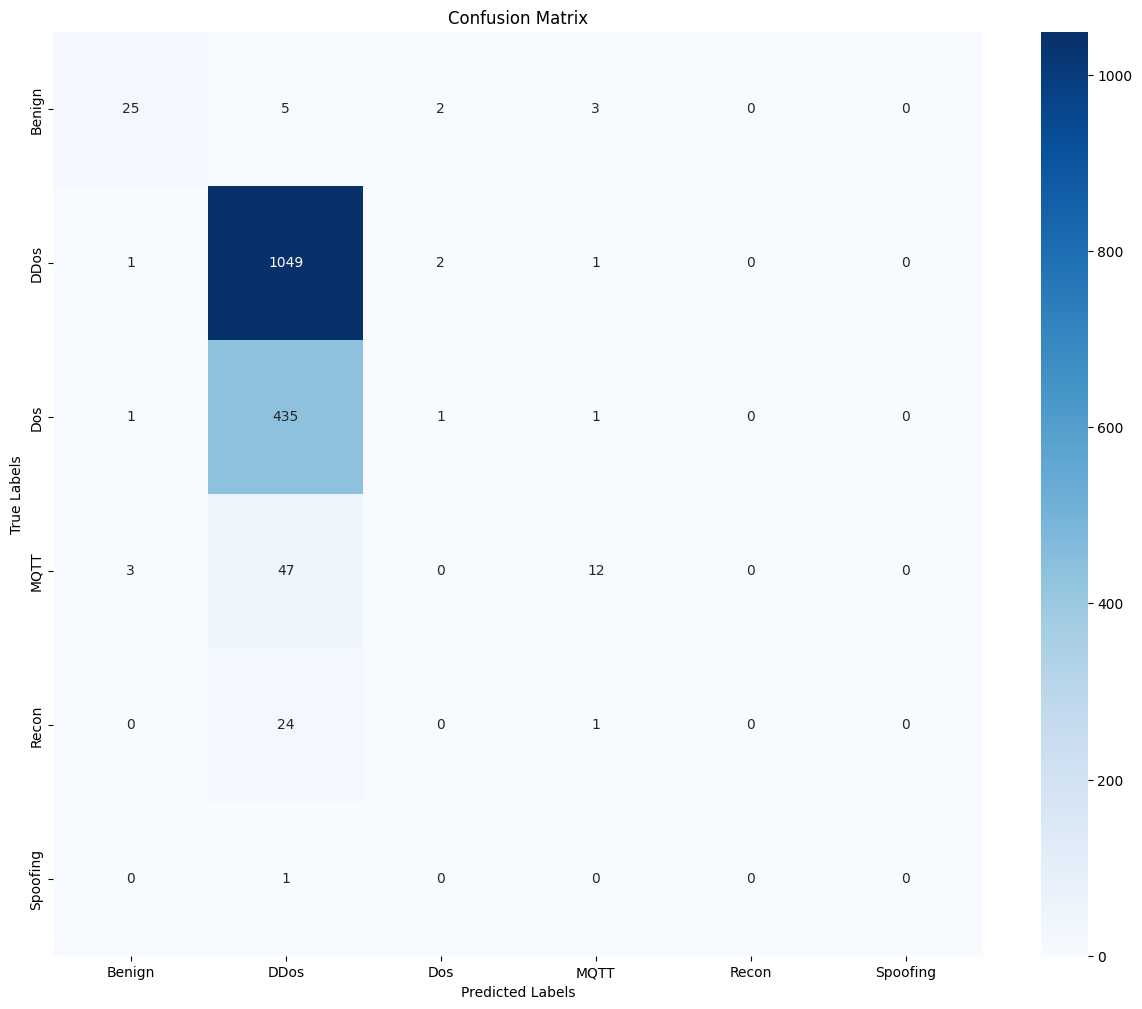

In [44]:
# generate the confusion matrix
cm_lr_pso_6 = confusion_matrix(y_test_full_6, y_pred_lr_pso_6)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_lr_pso_6, annot=True, fmt='d', cmap='Blues', xticklabels=lr_benchmark.classes_, yticklabels=lr_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 19 Class Classification

In [45]:
y_train_sample = y_train_sample_19
y_test_sample = y_test_sample_19

In [46]:
# create list of particles
lr_particles = []                              # initialize an empty list to hold the particles
for i in range(num_particles):                 # based on defined above number of particles
    particle = FeatureParticle(n_features)     # create a new particle
    lr_particles.append(particle)              # add the particle to the list

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

In [47]:
# Initialize global best
global_best_position = lr_particles[0].best_position
global_best_fitness = lr_particles[0].best_fitness
for i in range(num_particles):
    if lr_particles[i].best_fitness > global_best_fitness:
        global_best_position = lr_particles[i].best_position
        global_best_fitness = lr_particles[i].best_fitness

In [48]:
for iteration in range(num_iterations):
    iteration_start = time.time()
    print(f"Iteration {iteration + 1}/{num_iterations}")
    # Can change n_jobs to a specific number to limit the number of processes created
    # -1 uses all cores with 1 process per core
    lr_particles = Parallel(n_jobs=1)(delayed(update_particle)(particle) for particle in lr_particles)
    
    # Update global best after all particles have been processed
    for particle in lr_particles:
        if particle.best_fitness > global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = np.copy(particle.best_position)
    iteration_end = time.time()
    print(f"Iteration time: {iteration_end - iteration_start} seconds")

Iteration 1/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.6470649242401123 seconds
Iteration 2/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.7992048263549805 seconds
Iteration 3/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.726062059402466 seconds
Iteration 4/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.8640389442443848 seconds
Iteration 5/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.777711868286133 seconds
Iteration 6/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.712358236312866 seconds
Iteration 7/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.908508777618408 seconds
Iteration 8/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.8842320442199707 seconds
Iteration 9/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.878067970275879 seconds
Iteration 10/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.8341689109802246 seconds
Iteration 11/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.7952778339385986 seconds
Iteration 12/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.9544990062713623 seconds
Iteration 13/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.9950551986694336 seconds
Iteration 14/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.881657123565674 seconds
Iteration 15/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 3.055631160736084 seconds
Iteration 16/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.894895076751709 seconds
Iteration 17/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.847860097885132 seconds
Iteration 18/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.8586859703063965 seconds
Iteration 19/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 3.0560009479522705 seconds
Iteration 20/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    htt

Iteration time: 2.8959219455718994 seconds


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# use the best features identified by PSO
selected_features = np.where(global_best_position == 1)[0]
X_train_selected = X_train_full[:, selected_features]
X_test_selected = X_test_full[:, selected_features]

lr_benchmark.fit(X_train_selected, y_train_full_19) 
y_pred_lr_pso_19 = lr_benchmark.predict(X_test_selected)   

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# print the classification report
report_lr_pso_19 = classification_report(y_test_full_19, y_pred_lr_pso_19, output_dict=True)
print(classification_report(y_test_full_19, y_pred_lr_pso_19))

print(f"Number of selected features: {len(selected_features)}")

# calculate accuracy
accuracy_lr_pso_19 = accuracy_score(y_test_full_2, y_pred_lr_pso_19)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_lr_pso_19:.5f}")

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.63      0.69      0.66        35
         DDoS_ICMP       0.75      0.99      0.85       352
          DDoS_SYN       0.63      0.98      0.77       177
          DDoS_TCP       0.56      0.99      0.72       157
          DDoS_UDP       0.72      1.00      0.83       367
DDoS_connect_flood       0.00      0.00      0.00        41
DDoS_publish_flood       0.67      0.22      0.33         9
          DoS_ICMP       0.25      0.02      0.03       120
           DoS_SYN       0.00      0.00      0.00        97
           DoS_TCP       0.00      0.00      0.00        78
           DoS_UDP       0.00      0.00      0.00       143
 DoS_connect_flood       0.00      0.00      0.00         1
 DoS_publish_flood       0.20      0.09      0.12        11
           OS_scan       0.00      0.00      0.00         3
         Port_scan       0.00      0.00

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

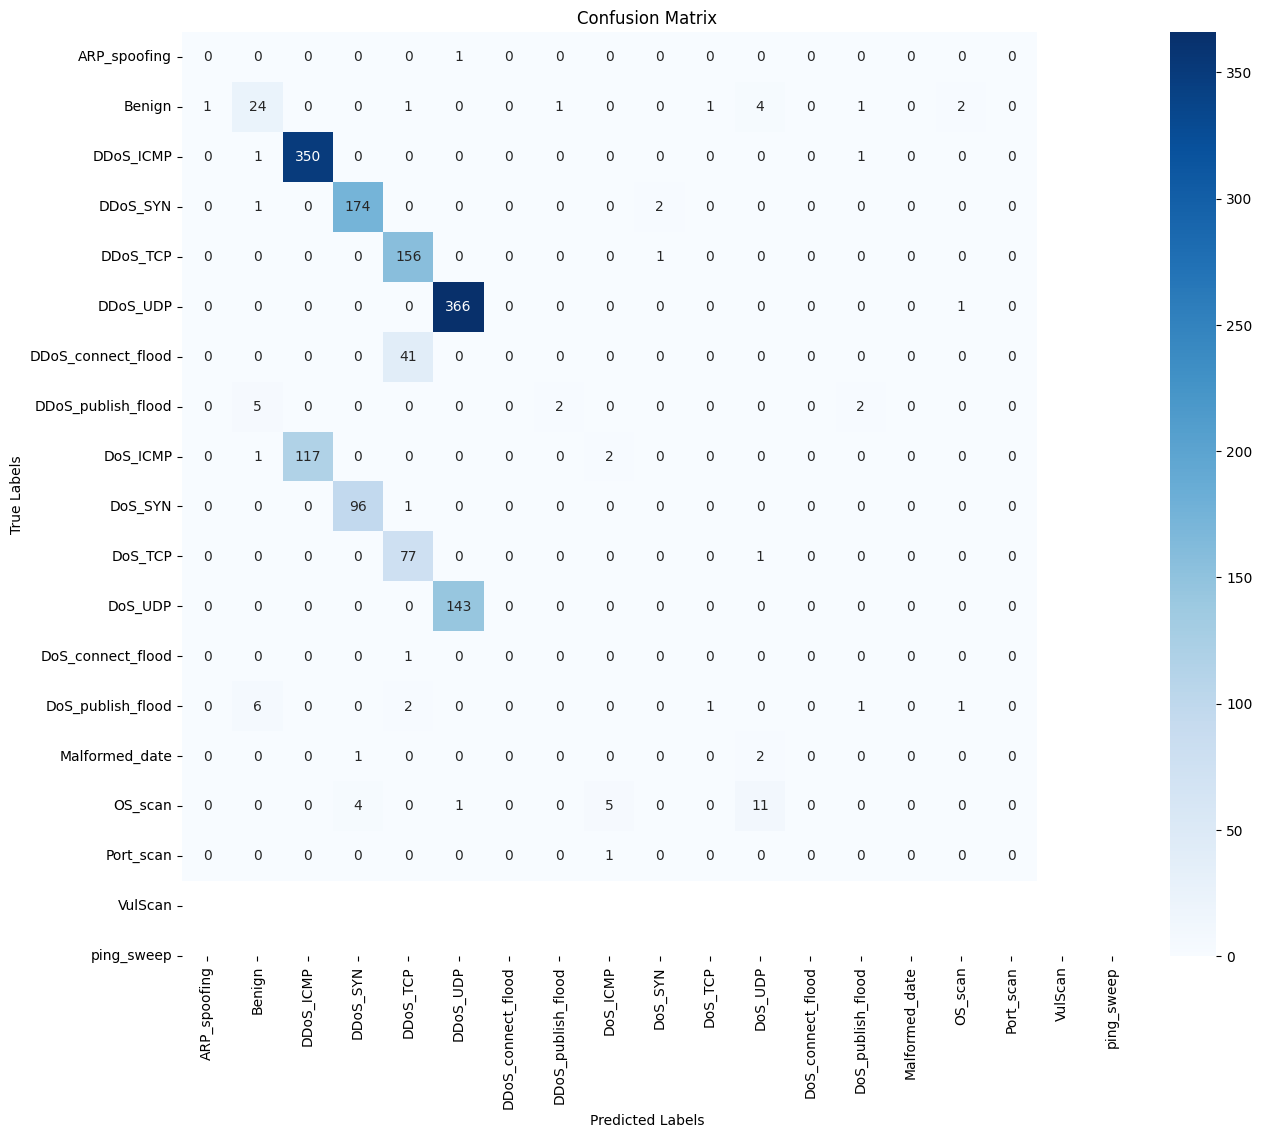

In [51]:
# generate the confusion matrix
cm_lr_pso_19 = confusion_matrix(y_test_full_19, y_pred_lr_pso_19)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_lr_pso_19, annot=True, fmt='d', cmap='Blues', xticklabels=lr_benchmark.classes_, yticklabels=lr_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### AdaBoost

In [52]:
CLASSIFIER = 'ada'

#### Binary Classification

In [53]:
y_train_sample = y_train_sample_2
y_test_sample = y_test_sample_2

In [54]:
# create list of particles
ada_particles = []                              # initialize an empty list to hold the particles
for i in range(num_particles):                 # based on defined above number of particles
    particle = FeatureParticle(n_features)     # create a new particle
    ada_particles.append(particle)              # add the particle to the list

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

In [55]:
# Initialize global best
global_best_position = ada_particles[0].best_position
global_best_fitness = ada_particles[0].best_fitness
for i in range(num_particles):
    if ada_particles[i].best_fitness > global_best_fitness:
        global_best_position = ada_particles[i].best_position
        global_best_fitness = ada_particles[i].best_fitness

In [56]:
for iteration in range(num_iterations):
    iteration_start = time.time()
    print(f"Iteration {iteration + 1}/{num_iterations}")
    # Can change n_jobs to a specific number to limit the number of processes created
    # -1 uses all cores with 1 process per core
    ada_particles = Parallel(n_jobs=-1)(delayed(update_particle)(particle) for particle in ada_particles)
    
    # Update global best after all particles have been processed
    for particle in ada_particles:
        if particle.best_fitness > global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = np.copy(particle.best_position)
    iteration_end = time.time()
    print(f"Iteration time: {iteration_end - iteration_start} seconds")

Iteration 1/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.2066469192504883 seconds
Iteration 2/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.0545992851257324 seconds
Iteration 3/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.6634039878845215 seconds
Iteration 4/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.1378490924835205 seconds
Iteration 5/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.312019109725952 seconds
Iteration 6/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.0621497631073 seconds
Iteration 7/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.319186210632324 seconds
Iteration 8/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.201677083969116 seconds
Iteration 9/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.6451401710510254 seconds
Iteration 10/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.3038840293884277 seconds
Iteration 11/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.402103900909424 seconds
Iteration 12/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.4103939533233643 seconds
Iteration 13/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 1.916468858718872 seconds
Iteration 14/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 1.9131340980529785 seconds
Iteration 15/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.1337828636169434 seconds
Iteration 16/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.2919631004333496 seconds
Iteration 17/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.0629401206970215 seconds
Iteration 18/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.1994760036468506 seconds
Iteration 19/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.129260778427124 seconds
Iteration 20/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.202153205871582 seconds


In [57]:
# use the best features identified by PSO
selected_features = np.where(global_best_position == 1)[0]
X_train_selected = X_train_full[:, selected_features]
X_test_selected = X_test_full[:, selected_features]

ada_benchmark.fit(X_train_selected, y_train_full_2) 
y_pred_ada_pso_2 = ada_benchmark.predict(X_test_selected)   

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [58]:
# print the classification report
report_ada_pso_2 = classification_report(y_test_full_2, y_pred_ada_pso_2, output_dict=True)
print(classification_report(y_test_full_2, y_pred_ada_pso_2))

print(f"Number of selected features: {len(selected_features)}")

# calculate accuracy
accuracy_ada_pso_2 = accuracy_score(y_test_full_2, y_pred_ada_pso_2)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_pso_2:.5f}")

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1579
      Benign       0.97      1.00      0.99        35

    accuracy                           1.00      1614
   macro avg       0.99      1.00      0.99      1614
weighted avg       1.00      1.00      1.00      1614

Number of selected features: 22
Accuracy: 0.99938


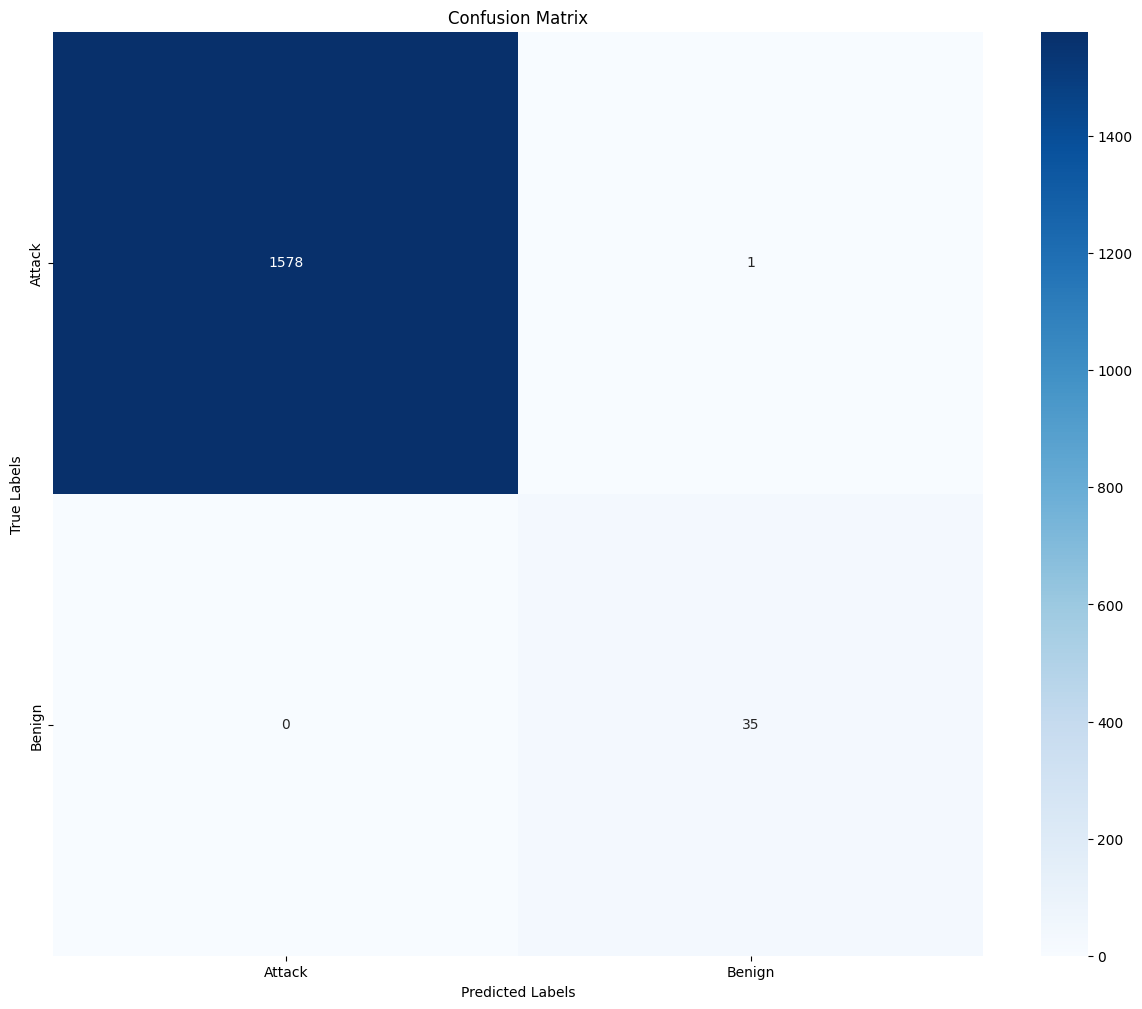

In [59]:
# generate the confusion matrix
cm_ada_pso_2 = confusion_matrix(y_test_full_2, y_pred_ada_pso_2)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_ada_pso_2, annot=True, fmt='d', cmap='Blues', xticklabels=ada_benchmark.classes_, yticklabels=ada_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 6 Class Classification

In [60]:
y_train_sample = y_train_sample_6
y_test_sample = y_test_sample_6

In [61]:
# create list of particles
ada_particles = []                              # initialize an empty list to hold the particles
for i in range(num_particles):                 # based on defined above number of particles
    particle = FeatureParticle(n_features)     # create a new particle
    ada_particles.append(particle)              # add the particle to the list

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

In [62]:
# Initialize global best
global_best_position = ada_particles[0].best_position
global_best_fitness = ada_particles[0].best_fitness
for i in range(num_particles):
    if ada_particles[i].best_fitness > global_best_fitness:
        global_best_position = ada_particles[i].best_position
        global_best_fitness = ada_particles[i].best_fitness

In [63]:
for iteration in range(num_iterations):
    iteration_start = time.time()
    print(f"Iteration {iteration + 1}/{num_iterations}")
    # Can change n_jobs to a specific number to limit the number of processes created
    # -1 uses all cores with 1 process per core
    ada_particles = Parallel(n_jobs=-1)(delayed(update_particle)(particle) for particle in ada_particles)
    
    # Update global best after all particles have been processed
    for particle in ada_particles:
        if particle.best_fitness > global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = np.copy(particle.best_position)
    iteration_end = time.time()
    print(f"Iteration time: {iteration_end - iteration_start} seconds")

Iteration 1/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.610032081604004 seconds
Iteration 2/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.888429641723633 seconds
Iteration 3/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.5834121704101562 seconds
Iteration 4/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.198103904724121 seconds
Iteration 5/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.6504738330841064 seconds
Iteration 6/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 2.914287805557251 seconds
Iteration 7/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.5560200214385986 seconds
Iteration 8/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.1160030364990234 seconds
Iteration 9/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.454771041870117 seconds
Iteration 10/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.3159890174865723 seconds
Iteration 11/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.1721677780151367 seconds
Iteration 12/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.1816036701202393 seconds
Iteration 13/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.2754929065704346 seconds
Iteration 14/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.891090154647827 seconds
Iteration 15/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.361516952514648 seconds
Iteration 16/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.6053638458251953 seconds
Iteration 17/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.76199197769165 seconds
Iteration 18/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.560616970062256 seconds
Iteration 19/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 3.325474977493286 seconds
Iteration 20/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.512139081954956 seconds


In [64]:
# use the best features identified by PSO
selected_features = np.where(global_best_position == 1)[0]
X_train_selected = X_train_full[:, selected_features]
X_test_selected = X_test_full[:, selected_features]

ada_benchmark.fit(X_train_selected, y_train_full_6) 
y_pred_ada_pso_6 = ada_benchmark.predict(X_test_selected)   

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [65]:
# print the classification report
report_ada_pso_6 = classification_report(y_test_full_6, y_pred_ada_pso_6, output_dict=True)
print(classification_report(y_test_full_6, y_pred_ada_pso_6))

print(f"Number of selected features: {len(selected_features)}")

# calculate accuracy
accuracy_ada_pso_6 = accuracy_score(y_test_full_6, y_pred_ada_pso_6)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_pso_6:.5f}")

              precision    recall  f1-score   support

      Benign       1.00      0.97      0.99        35
        DDos       1.00      1.00      1.00      1053
         Dos       1.00      1.00      1.00       438
        MQTT       1.00      1.00      1.00        62
       Recon       0.89      1.00      0.94        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           1.00      1614
   macro avg       0.82      0.83      0.82      1614
weighted avg       1.00      1.00      1.00      1614

Number of selected features: 23
Accuracy: 0.99814


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

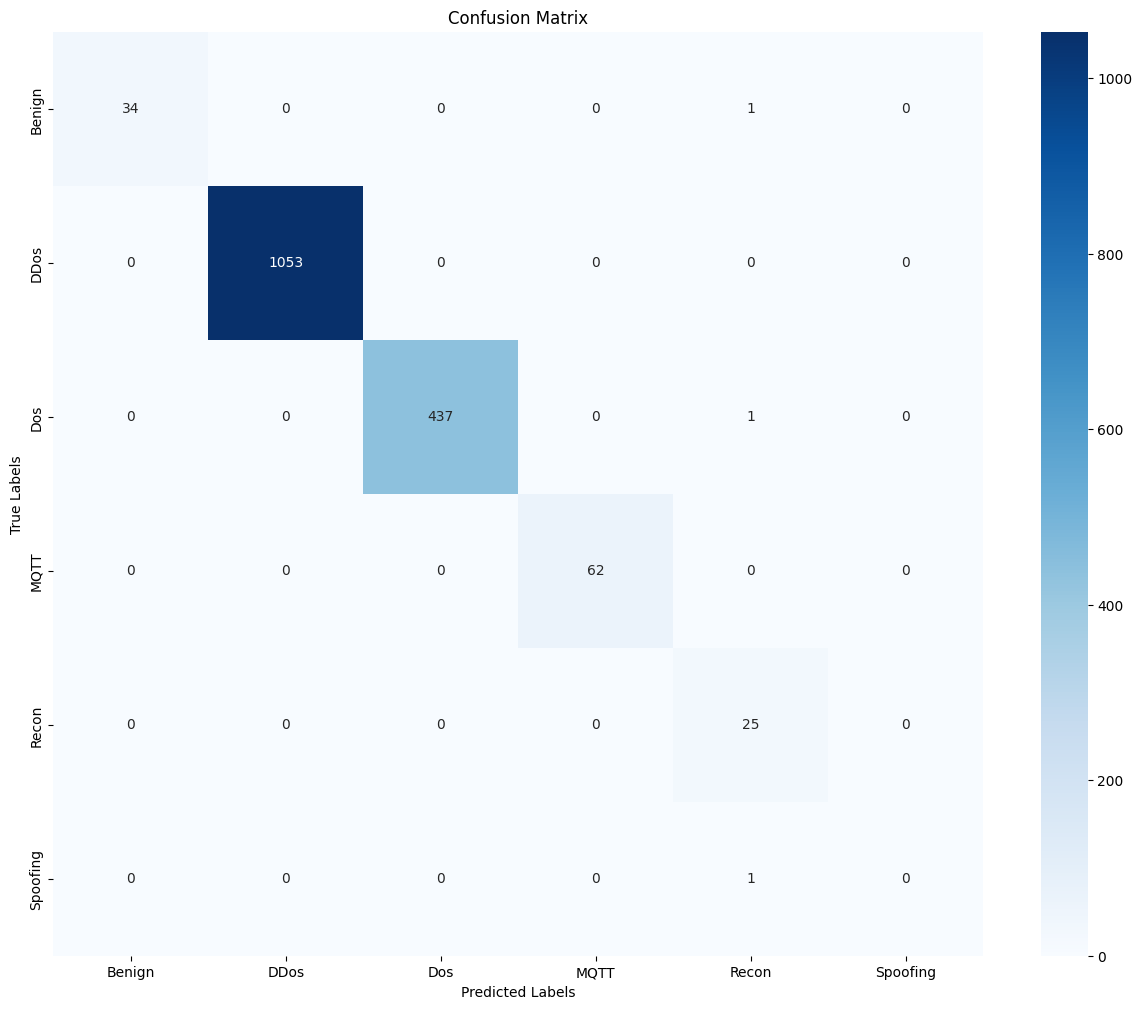

In [66]:
# generate the confusion matrix
cm_ada_pso_6 = confusion_matrix(y_test_full_6, y_pred_ada_pso_6)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_ada_pso_6, annot=True, fmt='d', cmap='Blues', xticklabels=ada_benchmark.classes_, yticklabels=ada_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 19 Class Classification

In [67]:
y_train_sample = y_train_sample_19
y_test_sample = y_test_sample_19

In [68]:
# create list of particles
ada_particles = []                              # initialize an empty list to hold the particles
for i in range(num_particles):                 # based on defined above number of particles
    particle = FeatureParticle(n_features)     # create a new particle
    ada_particles.append(particle)              # add the particle to the list

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

In [69]:
# Initialize global best
global_best_position = ada_particles[0].best_position
global_best_fitness = ada_particles[0].best_fitness
for i in range(num_particles):
    if ada_particles[i].best_fitness > global_best_fitness:
        global_best_position = ada_particles[i].best_position
        global_best_fitness = ada_particles[i].best_fitness

In [70]:
for iteration in range(num_iterations):
    iteration_start = time.time()
    print(f"Iteration {iteration + 1}/{num_iterations}")
    # Can change n_jobs to a specific number to limit the number of processes created
    # -1 uses all cores with 1 process per core
    ada_particles = Parallel(n_jobs=-1)(delayed(update_particle)(particle) for particle in ada_particles)
    
    # Update global best after all particles have been processed
    for particle in ada_particles:
        if particle.best_fitness > global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = np.copy(particle.best_position)
    iteration_end = time.time()
    print(f"Iteration time: {iteration_end - iteration_start} seconds")

Iteration 1/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.610147953033447 seconds
Iteration 2/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 6.074589252471924 seconds
Iteration 3/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.737986087799072 seconds
Iteration 4/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.549133062362671 seconds
Iteration 5/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.674753904342651 seconds
Iteration 6/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.999653100967407 seconds
Iteration 7/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.336750745773315 seconds
Iteration 8/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.952389240264893 seconds
Iteration 9/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 6.510048151016235 seconds
Iteration 10/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 6.039168834686279 seconds
Iteration 11/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.846273183822632 seconds
Iteration 12/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.983672142028809 seconds
Iteration 13/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.44404411315918 seconds
Iteration 14/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.248585939407349 seconds
Iteration 15/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.030638933181763 seconds
Iteration 16/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.2142767906188965 seconds
Iteration 17/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 6.057240009307861 seconds
Iteration 18/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.69111704826355 seconds
Iteration 19/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 5.303133010864258 seconds
Iteration 20/20


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

Iteration time: 4.900906085968018 seconds


In [71]:
# use the best features identified by PSO
selected_features = np.where(global_best_position == 1)[0]
X_train_selected = X_train_full[:, selected_features]
X_test_selected = X_test_full[:, selected_features]

ada_benchmark.fit(X_train_selected, y_train_full_19) 
y_pred_ada_pso_19 = ada_benchmark.predict(X_test_selected)   

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [72]:
# print the classification report
report_ada_pso_19 = classification_report(y_test_full_19, y_pred_ada_pso_19, output_dict=True)
print(classification_report(y_test_full_19, y_pred_ada_pso_19))

print(f"Number of selected features: {len(selected_features)}")

# calculate accuracy
accuracy_ada_pso_19 = accuracy_score(y_test_full_19, y_pred_ada_pso_19)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_ada_pso_19:.5f}")

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.97      0.97      0.97        35
         DDoS_ICMP       0.72      1.00      0.84       352
          DDoS_SYN       0.99      1.00      1.00       177
          DDoS_TCP       1.00      1.00      1.00       157
          DDoS_UDP       1.00      0.63      0.78       367
DDoS_connect_flood       0.84      1.00      0.91        41
DDoS_publish_flood       1.00      0.11      0.20         9
          DoS_ICMP       1.00      1.00      1.00       120
           DoS_SYN       1.00      0.99      0.99        97
           DoS_TCP       1.00      1.00      1.00        78
           DoS_UDP       1.00      1.00      1.00       143
 DoS_connect_flood       1.00      1.00      1.00         1
 DoS_publish_flood       1.00      1.00      1.00        11
           OS_scan       0.33      0.33      0.33         3
         Port_scan       0.89      0.76

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behav

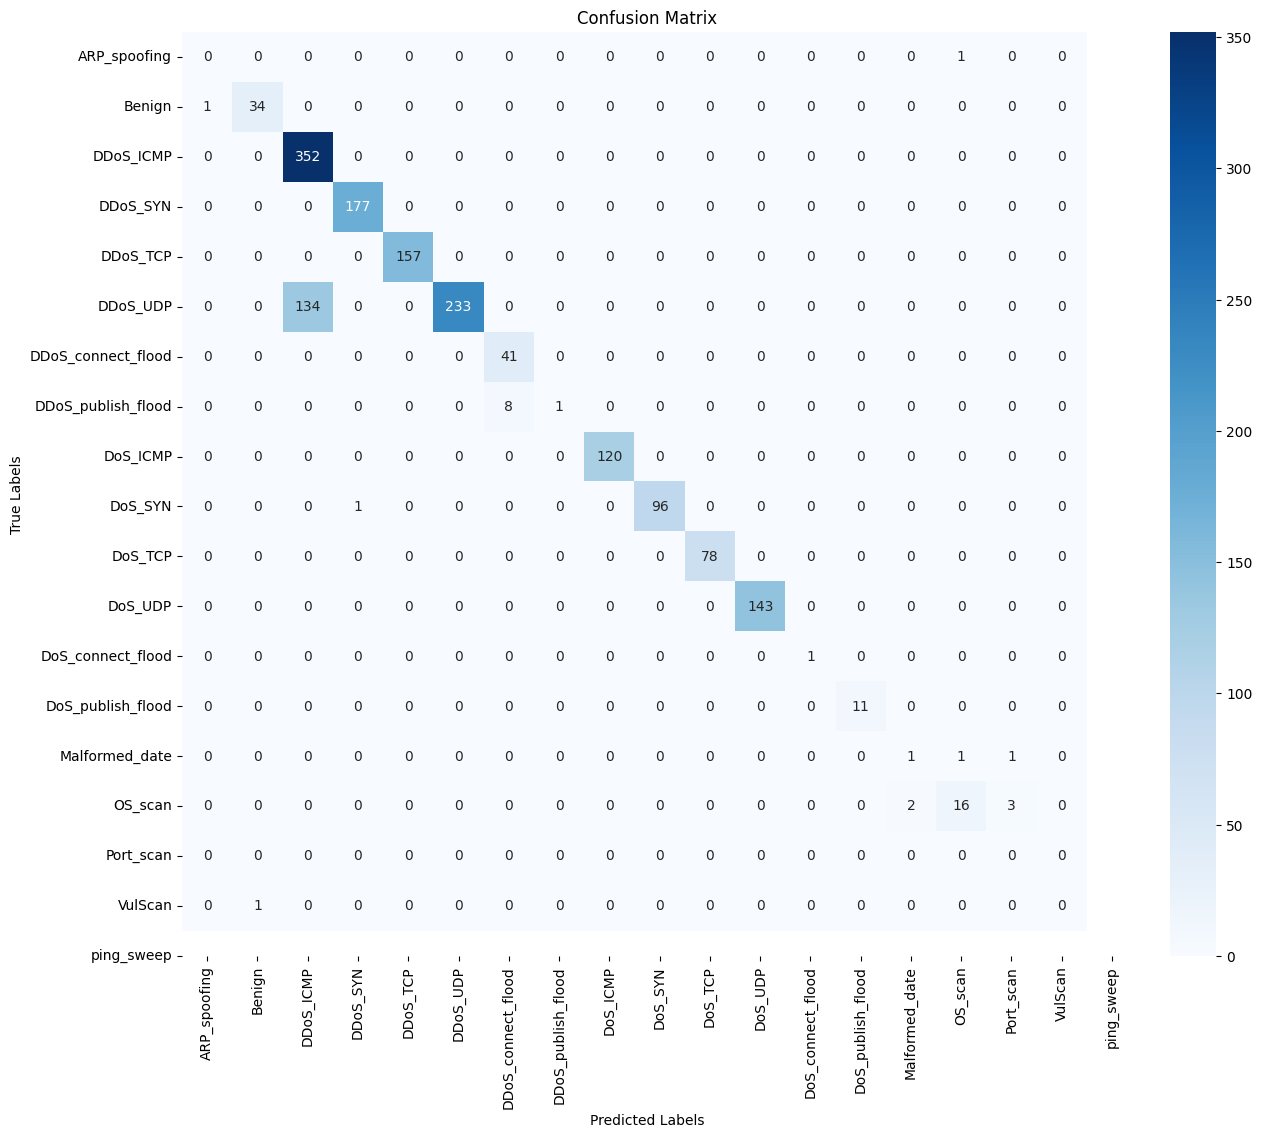

In [73]:
# generate the confusion matrix
cm_ada_pso_19 = confusion_matrix(y_test_full_19, y_pred_ada_pso_19)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_ada_pso_19, annot=True, fmt='d', cmap='Blues', xticklabels=ada_benchmark.classes_, yticklabels=ada_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Random Forest

In [74]:
CLASSIFIER = 'rf'

#### Binary Classification

In [75]:
y_train_sample = y_train_sample_2
y_test_sample = y_test_sample_2

In [76]:
# create list of particles
rf_particles = []                              # initialize an empty list to hold the particles
for i in range(num_particles):                 # based on defined above number of particles
    particle = FeatureParticle(n_features)     # create a new particle
    rf_particles.append(particle)              # add the particle to the list

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

In [77]:
# Initialize global best
global_best_position = rf_particles[0].best_position
global_best_fitness = rf_particles[0].best_fitness
for i in range(num_particles):
    if rf_particles[i].best_fitness > global_best_fitness:
        global_best_position = rf_particles[i].best_position
        global_best_fitness = rf_particles[i].best_fitness

In [78]:
for iteration in range(num_iterations):
    iteration_start = time.time()
    print(f"Iteration {iteration + 1}/{num_iterations}")
    # Can change n_jobs to a specific number to limit the number of processes created
    # -1 uses all cores with 1 process per core
    rf_particles = Parallel(n_jobs=1)(delayed(update_particle)(particle) for particle in rf_particles)
    
    # Update global best after all particles have been processed
    for particle in rf_particles:
        if particle.best_fitness > global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = np.copy(particle.best_position)
    iteration_end = time.time()
    print(f"Iteration time: {iteration_end - iteration_start} seconds")

Iteration 1/20
Iteration time: 1.5875170230865479 seconds
Iteration 2/20
Iteration time: 1.3832728862762451 seconds
Iteration 3/20
Iteration time: 1.3737080097198486 seconds
Iteration 4/20
Iteration time: 1.8339252471923828 seconds
Iteration 5/20
Iteration time: 1.3667478561401367 seconds
Iteration 6/20
Iteration time: 1.6840767860412598 seconds
Iteration 7/20
Iteration time: 1.5082602500915527 seconds
Iteration 8/20
Iteration time: 1.616365909576416 seconds
Iteration 9/20
Iteration time: 1.389948844909668 seconds
Iteration 10/20
Iteration time: 1.3592140674591064 seconds
Iteration 11/20
Iteration time: 1.3828916549682617 seconds
Iteration 12/20
Iteration time: 1.6482250690460205 seconds
Iteration 13/20
Iteration time: 1.4169950485229492 seconds
Iteration 14/20
Iteration time: 1.5886437892913818 seconds
Iteration 15/20
Iteration time: 1.4303653240203857 seconds
Iteration 16/20
Iteration time: 1.4781031608581543 seconds
Iteration 17/20
Iteration time: 1.622901201248169 seconds
Iteration

In [79]:
# use the best features identified by PSO
selected_features = np.where(global_best_position == 1)[0]
X_train_selected = X_train_full[:, selected_features]
X_test_selected = X_test_full[:, selected_features]

rf_benchmark.fit(X_train_selected, y_train_full_2) 
y_pred_rf_pso_2 = rf_benchmark.predict(X_test_selected)   

In [80]:
# print the classification report
report_rf_pso_2 = classification_report(y_test_full_2, y_pred_rf_pso_2, output_dict=True)
print(classification_report(y_test_full_2, y_pred_rf_pso_2))

print(f"Number of selected features: {len(selected_features)}")

# calculate accuracy
accuracy_rf_pso_2 = accuracy_score(y_test_full_2, y_pred_rf_pso_2)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_pso_2:.5f}")

              precision    recall  f1-score   support

      Attack       1.00      1.00      1.00      1579
      Benign       1.00      0.97      0.99        35

    accuracy                           1.00      1614
   macro avg       1.00      0.99      0.99      1614
weighted avg       1.00      1.00      1.00      1614

Number of selected features: 20
Accuracy: 0.99938


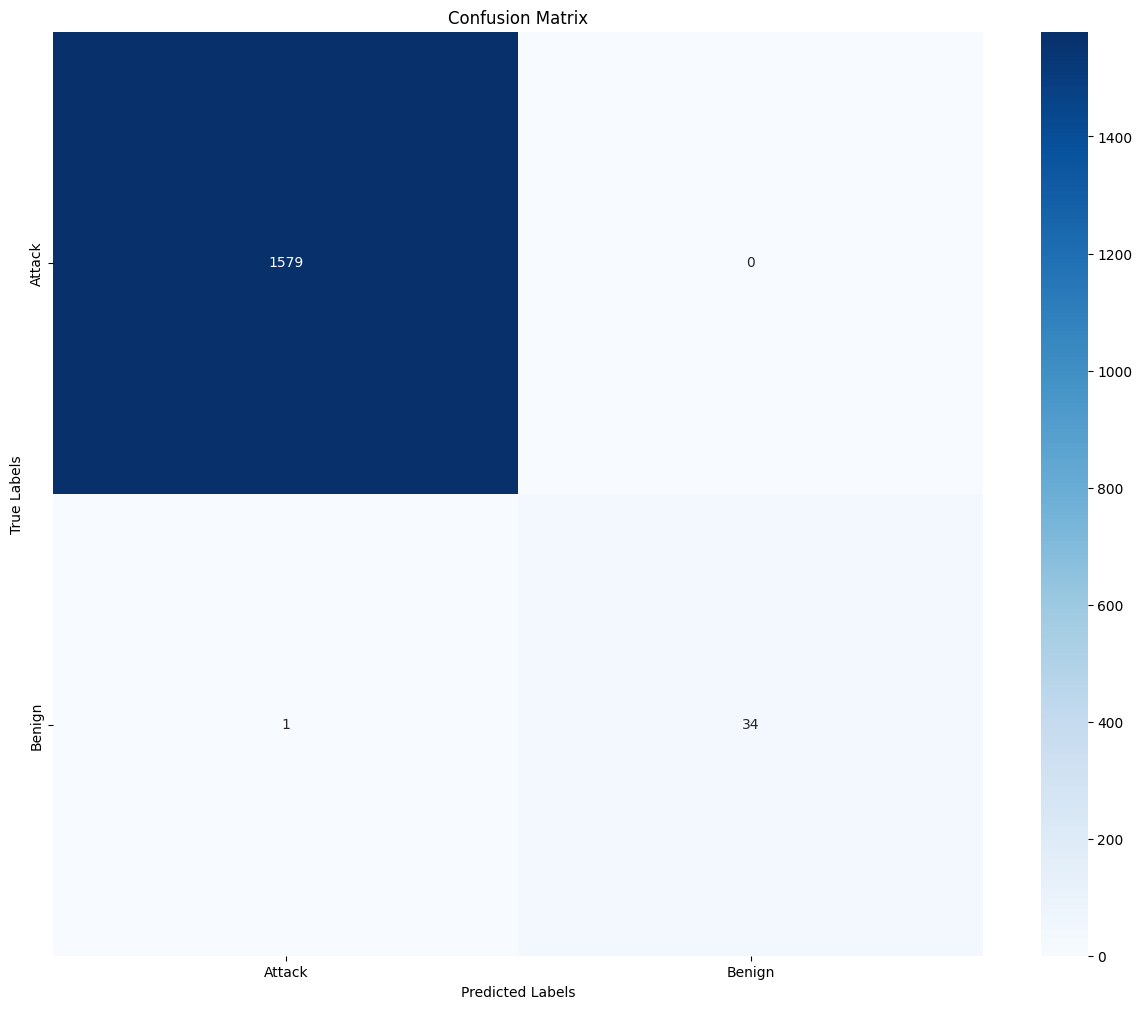

In [81]:
# generate the confusion matrix
cm_rf_pso_2 = confusion_matrix(y_test_full_2, y_pred_rf_pso_2)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_rf_pso_2, annot=True, fmt='d', cmap='Blues', xticklabels=rf_benchmark.classes_, yticklabels=rf_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 6 Class Classification

In [82]:
y_train_sample = y_train_sample_6
y_test_sample = y_test_sample_6

In [83]:
# create list of particles
rf_particles = []                              # initialize an empty list to hold the particles
for i in range(num_particles):                 # based on defined above number of particles
    particle = FeatureParticle(n_features)     # create a new particle
    rf_particles.append(particle)              # add the particle to the list

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

In [84]:
# Initialize global best
global_best_position = rf_particles[0].best_position
global_best_fitness = rf_particles[0].best_fitness
for i in range(num_particles):
    if rf_particles[i].best_fitness > global_best_fitness:
        global_best_position = rf_particles[i].best_position
        global_best_fitness = rf_particles[i].best_fitness

In [85]:
for iteration in range(num_iterations):
    iteration_start = time.time()
    print(f"Iteration {iteration + 1}/{num_iterations}")
    # Can change n_jobs to a specific number to limit the number of processes created
    # -1 uses all cores with 1 process per core
    rf_particles = Parallel(n_jobs=1)(delayed(update_particle)(particle) for particle in rf_particles)
    
    # Update global best after all particles have been processed
    for particle in rf_particles:
        if particle.best_fitness > global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = np.copy(particle.best_position)
    iteration_end = time.time()
    print(f"Iteration time: {iteration_end - iteration_start} seconds")

Iteration 1/20
Iteration time: 2.615032196044922 seconds
Iteration 2/20
Iteration time: 3.123807907104492 seconds
Iteration 3/20
Iteration time: 1.957880973815918 seconds
Iteration 4/20
Iteration time: 2.0420520305633545 seconds
Iteration 5/20
Iteration time: 2.167491912841797 seconds
Iteration 6/20
Iteration time: 1.8370709419250488 seconds
Iteration 7/20
Iteration time: 2.32196307182312 seconds
Iteration 8/20
Iteration time: 2.4381539821624756 seconds
Iteration 9/20
Iteration time: 1.9484050273895264 seconds
Iteration 10/20
Iteration time: 1.9859371185302734 seconds
Iteration 11/20
Iteration time: 2.2426750659942627 seconds
Iteration 12/20
Iteration time: 2.195178985595703 seconds
Iteration 13/20
Iteration time: 1.7384629249572754 seconds
Iteration 14/20
Iteration time: 1.8743669986724854 seconds
Iteration 15/20
Iteration time: 1.8044261932373047 seconds
Iteration 16/20
Iteration time: 2.1662750244140625 seconds
Iteration 17/20
Iteration time: 1.9823358058929443 seconds
Iteration 18/

In [86]:
# use the best features identified by PSO
selected_features = np.where(global_best_position == 1)[0]
X_train_selected = X_train_full[:, selected_features]
X_test_selected = X_test_full[:, selected_features]

rf_benchmark.fit(X_train_selected, y_train_full_6) 
y_pred_rf_pso_6 = rf_benchmark.predict(X_test_selected)   

In [87]:
# print the classification report
report_rf_pso_6 = classification_report(y_test_full_6, y_pred_rf_pso_6, output_dict=True)
print(classification_report(y_test_full_6, y_pred_rf_pso_6))

print(f"Number of selected features: {len(selected_features)}")

# calculate accuracy
accuracy_rf_pso_6 = accuracy_score(y_test_full_6, y_pred_rf_pso_6)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_pso_6:.5f}")

              precision    recall  f1-score   support

      Benign       0.89      0.94      0.92        35
        DDos       1.00      1.00      1.00      1053
         Dos       1.00      1.00      1.00       438
        MQTT       1.00      0.98      0.99        62
       Recon       0.89      0.96      0.92        25
    Spoofing       0.00      0.00      0.00         1

    accuracy                           1.00      1614
   macro avg       0.80      0.81      0.80      1614
weighted avg       1.00      1.00      1.00      1614

Number of selected features: 24
Accuracy: 0.99566


/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

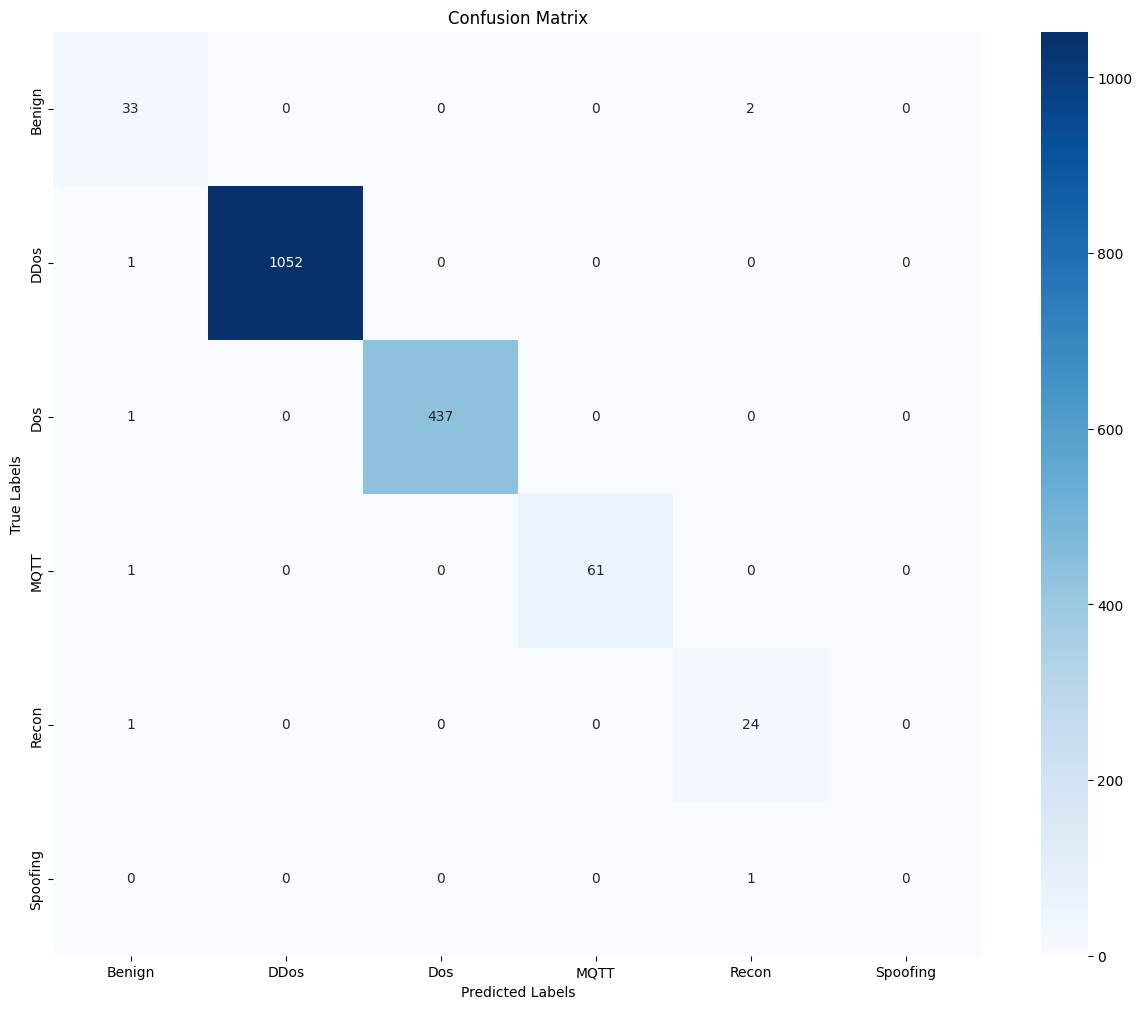

In [88]:
# generate the confusion matrix
cm_rf_pso_6 = confusion_matrix(y_test_full_6, y_pred_rf_pso_6)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_rf_pso_6, annot=True, fmt='d', cmap='Blues', xticklabels=rf_benchmark.classes_, yticklabels=rf_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 19 Class Classification

In [89]:
y_train_sample = y_train_sample_19
y_test_sample = y_test_sample_19

In [90]:
# create list of particles
rf_particles = []                              # initialize an empty list to hold the particles
for i in range(num_particles):                 # based on defined above number of particles
    particle = FeatureParticle(n_features)     # create a new particle
    rf_particles.append(particle)              # add the particle to the list

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: Future

In [91]:
# Initialize global best
global_best_position = rf_particles[0].best_position
global_best_fitness = rf_particles[0].best_fitness
for i in range(num_particles):
    if rf_particles[i].best_fitness > global_best_fitness:
        global_best_position = rf_particles[i].best_position
        global_best_fitness = rf_particles[i].best_fitness

In [92]:
for iteration in range(num_iterations):
    iteration_start = time.time()
    print(f"Iteration {iteration + 1}/{num_iterations}")
    # Can change n_jobs to a specific number to limit the number of processes created
    # -1 uses all cores with 1 process per core
    rf_particles = Parallel(n_jobs=1)(delayed(update_particle)(particle) for particle in rf_particles)
    
    # Update global best after all particles have been processed
    for particle in rf_particles:
        if particle.best_fitness > global_best_fitness:
            global_best_fitness = particle.best_fitness
            global_best_position = np.copy(particle.best_position)
    iteration_end = time.time()
    print(f"Iteration time: {iteration_end - iteration_start} seconds")

Iteration 1/20
Iteration time: 2.500555992126465 seconds
Iteration 2/20
Iteration time: 2.4066836833953857 seconds
Iteration 3/20
Iteration time: 2.073618173599243 seconds
Iteration 4/20
Iteration time: 2.043674945831299 seconds
Iteration 5/20
Iteration time: 2.53590989112854 seconds
Iteration 6/20
Iteration time: 2.0446836948394775 seconds
Iteration 7/20
Iteration time: 2.0944807529449463 seconds
Iteration 8/20
Iteration time: 1.9766571521759033 seconds
Iteration 9/20
Iteration time: 2.412909746170044 seconds
Iteration 10/20
Iteration time: 2.4188742637634277 seconds
Iteration 11/20
Iteration time: 2.1208791732788086 seconds
Iteration 12/20
Iteration time: 2.212662935256958 seconds
Iteration 13/20
Iteration time: 2.0691208839416504 seconds
Iteration 14/20
Iteration time: 2.323621988296509 seconds
Iteration 15/20
Iteration time: 2.4461448192596436 seconds
Iteration 16/20
Iteration time: 2.249263048171997 seconds
Iteration 17/20
Iteration time: 2.01751708984375 seconds
Iteration 18/20
I

In [93]:
# use the best features identified by PSO
selected_features = np.where(global_best_position == 1)[0]
X_train_selected = X_train_full[:, selected_features]
X_test_selected = X_test_full[:, selected_features]

rf_benchmark.fit(X_train_selected, y_train_full_19) 
y_pred_rf_pso_19 = rf_benchmark.predict(X_test_selected)   

In [94]:
# print the classification report
report_rf_pso_19 = classification_report(y_test_full_19, y_pred_rf_pso_19, output_dict=True)
print(classification_report(y_test_full_19, y_pred_rf_pso_19))

print(f"Number of selected features: {len(selected_features)}")

# calculate accuracy
accuracy_rf_pso_19 = accuracy_score(y_test_full_19, y_pred_rf_pso_19)

# print accuracy with 5 decimal places
print(f"Accuracy: {accuracy_rf_pso_19:.5f}")

                    precision    recall  f1-score   support

      ARP_spoofing       0.00      0.00      0.00         1
            Benign       0.92      0.97      0.94        35
         DDoS_ICMP       1.00      1.00      1.00       352
          DDoS_SYN       1.00      1.00      1.00       177
          DDoS_TCP       1.00      1.00      1.00       157
          DDoS_UDP       1.00      1.00      1.00       367
DDoS_connect_flood       1.00      1.00      1.00        41
DDoS_publish_flood       1.00      0.11      0.20         9
          DoS_ICMP       1.00      0.99      1.00       120
           DoS_SYN       1.00      0.99      0.99        97
           DoS_TCP       0.99      1.00      0.99        78
           DoS_UDP       1.00      1.00      1.00       143
 DoS_connect_flood       1.00      1.00      1.00         1
 DoS_publish_flood       0.58      1.00      0.73        11
           OS_scan       0.50      0.33      0.40         3
         Port_scan       0.83      0.95

/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/alexcoward/.local/share/virtualenvs/pso-NFvADFv5/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control th

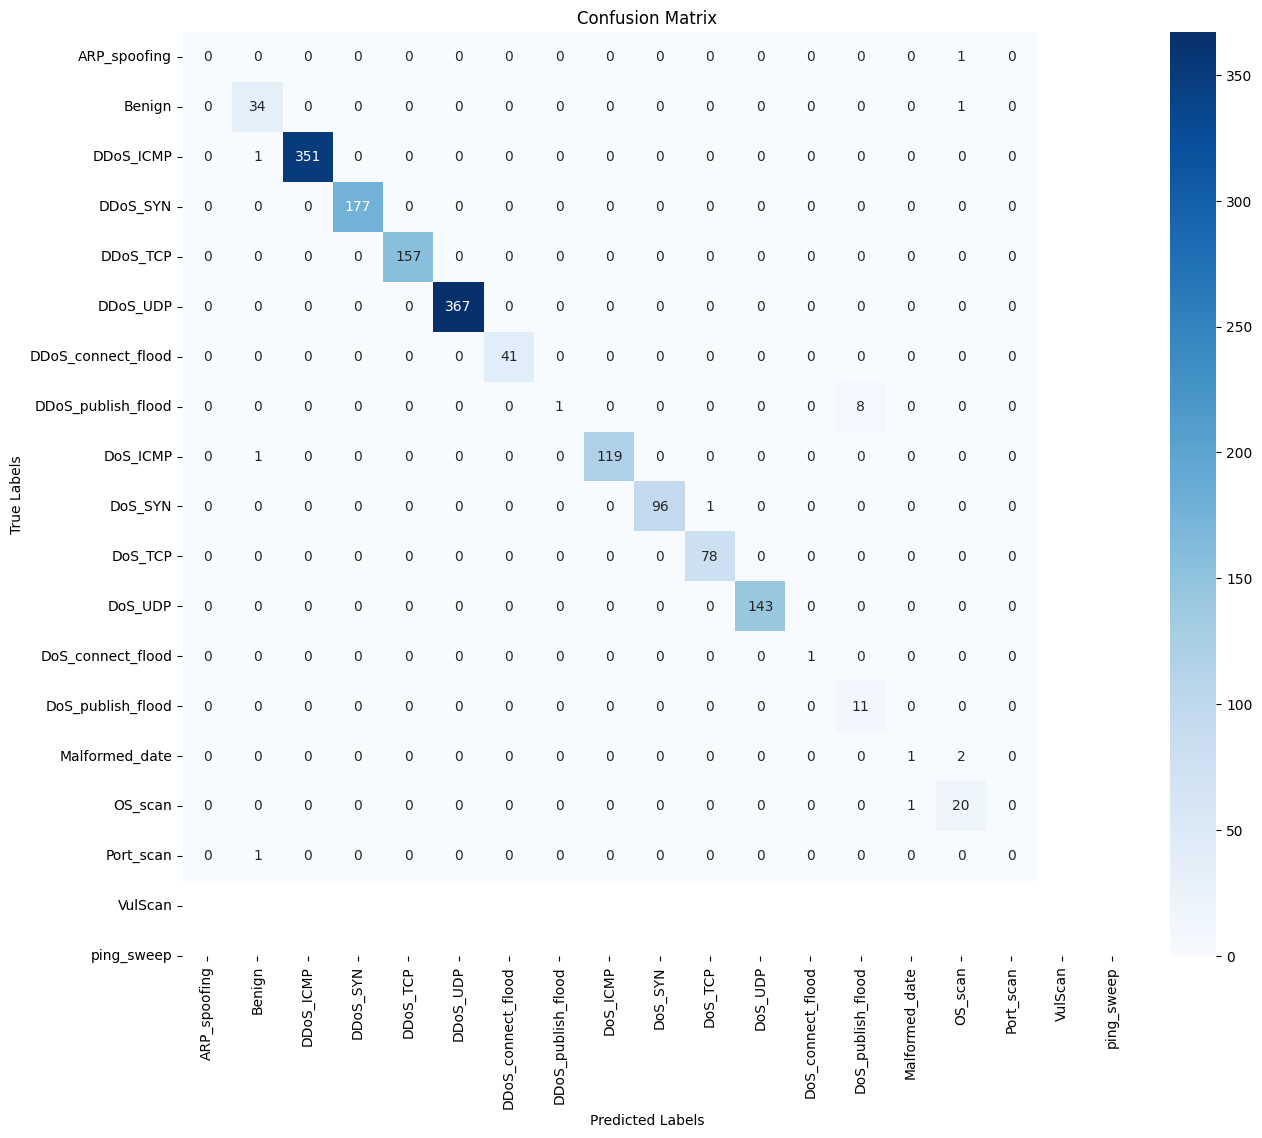

In [95]:
# generate the confusion matrix
cm_rf_pso_19 = confusion_matrix(y_test_full_19, y_pred_rf_pso_19)

# visualize the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(cm_rf_pso_19, annot=True, fmt='d', cmap='Blues', xticklabels=rf_benchmark.classes_, yticklabels=rf_benchmark.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Results

In [105]:
report_lr_benchmark_2

{'Attack': {'precision': 0.9917617237008872,
  'recall': 0.9911336288790373,
  'f1-score': 0.9914475768134304,
  'support': 1579.0},
 'Benign': {'precision': 0.6111111111111112,
  'recall': 0.6285714285714286,
  'f1-score': 0.6197183098591549,
  'support': 35.0},
 'accuracy': 0.983271375464684,
 'macro avg': {'precision': 0.8014364174059991,
  'recall': 0.809852528725233,
  'f1-score': 0.8055829433362927,
  'support': 1614.0},
 'weighted avg': {'precision': 0.9835072184712452,
  'recall': 0.983271375464684,
  'f1-score': 0.9833865332301592,
  'support': 1614.0}}

In [141]:
binary_results_df = pd.DataFrame(columns=['Model','Accuracy', 'Avg. Precision', 'Avg. Recall', 'Avg. f1-score'])

In [142]:
binary_results_df['Model'] = ['Logistic Regression Benchmark', 'Logistic Regression PSO', 'AdaBoost Benchmark', 'AdaBoost PSO', 'Random Forest Benchmark', 'Random Forest PSO']

In [147]:
for i, report in enumerate((report_lr_benchmark_2, report_lr_pso_2, report_ada_benchmark_2, report_ada_pso_2, report_rf_benchmark_2, report_rf_pso_2)):
    binary_results_df.at[i, 'Accuracy'] = report['accuracy']
    binary_results_df.at[i, 'Avg. Precision'] = report['weighted avg']['precision']
    binary_results_df.at[i, 'Avg. Recall'] = report['weighted avg']['recall']
    binary_results_df.at[i, 'Avg. f1-score'] = report['weighted avg']['f1-score']

In [149]:
six_results_df = pd.DataFrame(columns=['Model','Accuracy', 'Avg. Precision', 'Avg. Recall', 'Avg. f1-score'])

In [150]:
six_results_df['Model'] = ['Logistic Regression Benchmark', 'Logistic Regression PSO', 'AdaBoost Benchmark', 'AdaBoost PSO', 'Random Forest Benchmark', 'Random Forest PSO']

In [151]:
for i, report in enumerate((report_lr_benchmark_6, report_lr_pso_6, report_ada_benchmark_6, report_ada_pso_6, report_rf_benchmark_6, report_rf_pso_6)):
    six_results_df.at[i, 'Accuracy'] = report['accuracy']
    six_results_df.at[i, 'Avg. Precision'] = report['weighted avg']['precision']
    six_results_df.at[i, 'Avg. Recall'] = report['weighted avg']['recall']
    six_results_df.at[i, 'Avg. f1-score'] = report['weighted avg']['f1-score']

In [153]:
nineteen_results_df = pd.DataFrame(columns=['Model','Accuracy', 'Avg. Precision', 'Avg. Recall', 'Avg. f1-score'])

In [154]:
nineteen_results_df['Model'] = ['Logistic Regression Benchmark', 'Logistic Regression PSO', 'AdaBoost Benchmark', 'AdaBoost PSO', 'Random Forest Benchmark', 'Random Forest PSO']

In [155]:
for i, report in enumerate((report_lr_benchmark_19, report_lr_pso_19, report_ada_benchmark_19, report_ada_pso_19, report_rf_benchmark_19, report_rf_pso_19)):
    nineteen_results_df.at[i, 'Accuracy'] = report['accuracy']
    nineteen_results_df.at[i, 'Avg. Precision'] = report['weighted avg']['precision']
    nineteen_results_df.at[i, 'Avg. Recall'] = report['weighted avg']['recall']
    nineteen_results_df.at[i, 'Avg. f1-score'] = report['weighted avg']['f1-score']

In [156]:
binary_results_df

,Model,Accuracy,Avg. Precision,Avg. Recall,Avg. f1-score
0,Logistic Regression Benchmark,0.983271,0.983507,0.983271,0.983387
1,Logistic Regression PSO,0.994424,0.994353,0.994424,0.994384
2,AdaBoost Benchmark,0.995043,0.994935,0.995043,0.994972
3,AdaBoost PSO,0.99938,0.999398,0.99938,0.999385
4,Random Forest Benchmark,0.996902,0.996849,0.996902,0.996834
5,Random Forest PSO,0.99938,0.999381,0.99938,0.999376


In [157]:
six_results_df

,Model,Accuracy,Avg. Precision,Avg. Recall,Avg. f1-score
0,Logistic Regression Benchmark,0.666667,0.476393,0.666667,0.542696
1,Logistic Regression PSO,0.673482,0.536383,0.673482,0.553061
2,AdaBoost Benchmark,0.995043,0.995086,0.995043,0.99486
3,AdaBoost PSO,0.998141,0.997721,0.998141,0.997879
4,Random Forest Benchmark,0.995043,0.994689,0.995043,0.99482
5,Random Forest PSO,0.995663,0.995315,0.995663,0.995449


In [158]:
nineteen_results_df

,Model,Accuracy,Avg. Precision,Avg. Recall,Avg. f1-score
0,Logistic Regression Benchmark,0.403346,0.19675,0.403346,0.262452
1,Logistic Regression PSO,0.666047,0.487457,0.666047,0.549312
2,AdaBoost Benchmark,0.907063,0.930123,0.907063,0.902786
3,AdaBoost PSO,0.905204,0.930561,0.905204,0.901571
4,Random Forest Benchmark,0.989467,0.991141,0.989467,0.987447
5,Random Forest PSO,0.989467,0.990423,0.989467,0.987476


## Notebook Duration

In [97]:
end_time = time.time()
print(f"Notebook Duration: {(end_time - start_time) / 60} minutes")

Notebook Duration: 8.487414189179738 minutes
